### LAB 06 - BÀI 1: K NEAREST NEIGHBORS (KNN)
#### Câu 1: KNN trên Iris Dataset
#### Câu 2: KNN cho Letter Recognition

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

# ==============================================================================
# PHẦN 1: XÂY DỰNG CLASS KNN
# ==============================================================================


In [3]:
class KNN_Classifier:
    """
    K Nearest Neighbors Classifier
    Thuật toán: Phân loại dựa trên k láng giềng gần nhất
    """
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None
    
    def fit(self, X_train, y_train):
        """
        Lưu trữ dữ liệu training
        KNN là lazy learning - không có quá trình training phức tạp
        """
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)
        print(f"Đã lưu {len(self.X_train)} training samples")
    
    def euclidean_distance(self, x1, x2):
        """
        Tính khoảng cách Euclidean giữa 2 điểm
        distance = sqrt(sum((x1_i - x2_i)^2))
        """
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def predict_single(self, x):
        """
        Dự đoán cho 1 sample
        Các bước:
        1. Tính khoảng cách từ x đến tất cả training samples
        2. Sắp xếp và lấy k nearest neighbors
        3. Voting: lấy class xuất hiện nhiều nhất
        """
        distances = []
        for i in range(len(self.X_train)):
            dist = self.euclidean_distance(x, self.X_train[i])
            distances.append((dist, self.y_train[i]))
        
        # Sắp xếp theo khoảng cách
        distances.sort(key=lambda x: x[0])
        k_nearest = distances[:self.k]
        
        # Voting
        k_nearest_labels = [label for _, label in k_nearest]
        most_common = Counter(k_nearest_labels).most_common(1)
        
        return most_common[0][0]
    
    def predict(self, X_test):
        """Dự đoán cho nhiều samples"""
        predictions = [self.predict_single(x) for x in X_test]
        return np.array(predictions)
    
    def score(self, X_test, y_test):
        """Tính accuracy"""
        predictions = self.predict(X_test)
        return accuracy_score(y_test, predictions)


# ==============================================================================
# CÂU 1: KNN TRÊN IRIS DATASET
# ==============================================================================


In [4]:
# 1. Load Iris dataset
print("\n--- BƯỚC 1: LOAD DỮ LIỆU ---")
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
target_names = iris.target_names
feature_names = iris.feature_names

print(f"Số samples: {X_iris.shape[0]}")
print(f"Số features: {X_iris.shape[1]}")
print(f"Các classes: {list(target_names)}")
print(f"Feature names: {list(feature_names)}")

# Hiển thị 5 dòng đầu
df_iris = pd.DataFrame(X_iris, columns=feature_names)
df_iris['species'] = [target_names[i] for i in y_iris]
print("\nDữ liệu mẫu:")
print(df_iris.head())

# Thống kê
print("\nPhân bố classes:")
for i, name in enumerate(target_names):
    count = np.sum(y_iris == i)
    print(f"  - {name}: {count} samples")



--- BƯỚC 1: LOAD DỮ LIỆU ---
Số samples: 150
Số features: 4
Các classes: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Dữ liệu mẫu:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Phân bố classes:
  - setosa: 50 samples
  - versicolor: 50 samples
  - virginica: 50 samples


In [5]:
# 2. Chia train/test
print("\n--- BƯỚC 2: CHIA DỮ LIỆU TRAIN/TEST ---")
X_train, X_test, y_train, y_test = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)
print(f"Training set: {len(X_train)} samples ({len(X_train)/len(X_iris)*100:.1f}%)")
print(f"Test set: {len(X_test)} samples ({len(X_test)/len(X_iris)*100:.1f}%)")



--- BƯỚC 2: CHIA DỮ LIỆU TRAIN/TEST ---
Training set: 105 samples (70.0%)
Test set: 45 samples (30.0%)


In [6]:
# 3. Thử nghiệm với các giá trị k khác nhau
print("\n--- BƯỚC 3: THỬ NGHIỆM VỚI CÁC GIÁ TRỊ K ---")
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
accuracies = []

print(f"{'k':<5} {'Accuracy':<15} {'Errors':<10}")
print("-" * 30)

for k in k_values:
    knn = KNN_Classifier(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    errors = np.sum(y_pred != y_test)
    accuracies.append(acc)
    print(f"{k:<5} {acc*100:>6.2f}%        {errors:<10}")



--- BƯỚC 3: THỬ NGHIỆM VỚI CÁC GIÁ TRỊ K ---
k     Accuracy        Errors    
------------------------------
Đã lưu 105 training samples
1      93.33%        3         
Đã lưu 105 training samples
3      95.56%        2         
Đã lưu 105 training samples
5      97.78%        1         
Đã lưu 105 training samples
7      95.56%        2         
Đã lưu 105 training samples
9      95.56%        2         
Đã lưu 105 training samples
11     93.33%        3         
Đã lưu 105 training samples
13     93.33%        3         
Đã lưu 105 training samples
15     95.56%        2         


In [7]:
# 4. Chọn k tốt nhất
print("\n--- BƯỚC 4: CHỌN K TỐT NHẤT ---")
best_k = k_values[np.argmax(accuracies)]
best_acc = max(accuracies)
print(f"K tốt nhất: {best_k}")
print(f"Accuracy cao nhất: {best_acc*100:.2f}%")



--- BƯỚC 4: CHỌN K TỐT NHẤT ---
K tốt nhất: 5
Accuracy cao nhất: 97.78%



--- BƯỚC 5: ĐÁNH GIÁ CHI TIẾT VỚI K TỐT NHẤT ---
Đã lưu 105 training samples

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]

✓ Đã lưu confusion matrix: knn_iris_confusion_matrix.png
✓ Đã lưu biểu đồ K values: knn_iris_k_values.png


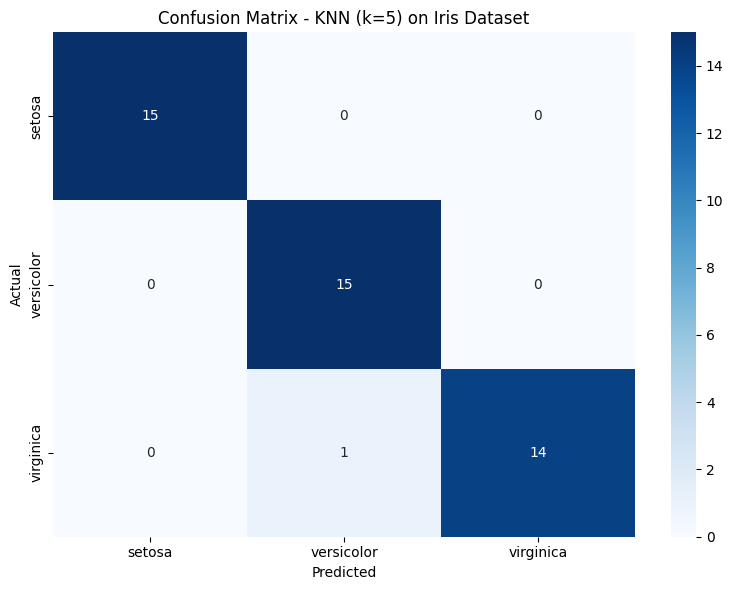

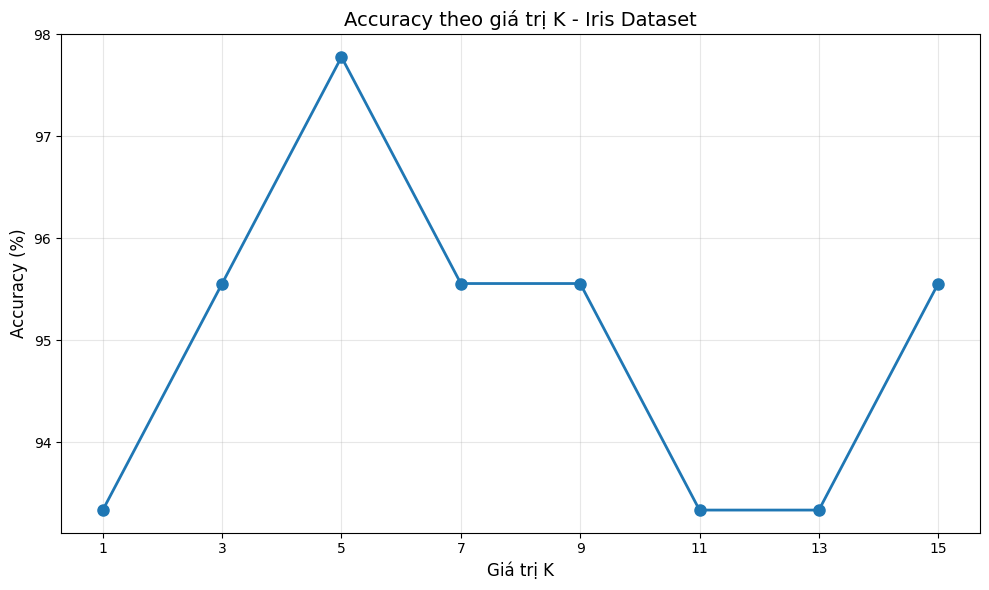

In [ ]:
# 5. Huấn luyện với k tốt nhất
print("\n--- BƯỚC 5: ĐÁNH GIÁ CHI TIẾT VỚI K TỐT NHẤT ---")
knn_final = KNN_Classifier(k=best_k)
knn_final.fit(X_train, y_train)
y_pred_final = knn_final.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_final, target_names=target_names))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_final)
print(cm)

# Vẽ confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.title(f'Confusion Matrix - KNN (k={best_k}) on Iris Dataset')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# Vẽ biểu đồ accuracy theo k
plt.figure(figsize=(10, 6))
plt.plot(k_values, [a*100 for a in accuracies], marker='o', linewidth=2, markersize=8)
plt.xlabel('Giá trị K', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Accuracy theo giá trị K - Iris Dataset', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.tight_layout()
plt.show()


In [9]:
# 6. Test với dữ liệu mới
print("\n--- BƯỚC 6: TEST VỚI DỮ LIỆU MỚI ---")
new_samples = np.array([
    [5.1, 3.5, 1.4, 0.2],  # Giống setosa
    [6.5, 3.0, 5.2, 2.0],  # Giống virginica
    [5.7, 2.8, 4.1, 1.3]   # Giống versicolor
])

predictions = knn_final.predict(new_samples)
print("\nDự đoán cho dữ liệu mới:")
for i, sample in enumerate(new_samples):
    pred_name = target_names[predictions[i]]
    print(f"Sample {i+1}: {sample} => Predicted: {pred_name}")



--- BƯỚC 6: TEST VỚI DỮ LIỆU MỚI ---

Dự đoán cho dữ liệu mới:
Sample 1: [5.1 3.5 1.4 0.2] => Predicted: setosa
Sample 2: [6.5 3.  5.2 2. ] => Predicted: virginica
Sample 3: [5.7 2.8 4.1 1.3] => Predicted: versicolor


# ==============================================================================
# CÂU 2: KNN CHO LETTER RECOGNITION
# ==============================================================================



--- BƯỚC 1: LOAD DỮ LIỆU LETTER RECOGNITION ---
Đang tải dữ liệu từ UCI repository...
✓ Đã tải thành công!
  Số samples: 20000
  Số features: 16
  Số classes: 26

Dữ liệu mẫu:
  letter  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0      T          2          8          3          5          1          8   
1      I          5         12          3          7          2         10   
2      D          4         11          6          8          6         10   
3      N          7         11          6          6          3          5   
4      G          2          1          3          1          1          8   
5      S          4         11          5          8          3          8   
6      B          4          2          5          4          4          8   
7      A          1          1          3          2          1          8   
8      J          2          2          4          4          2         10   
9      M         11         15         13  

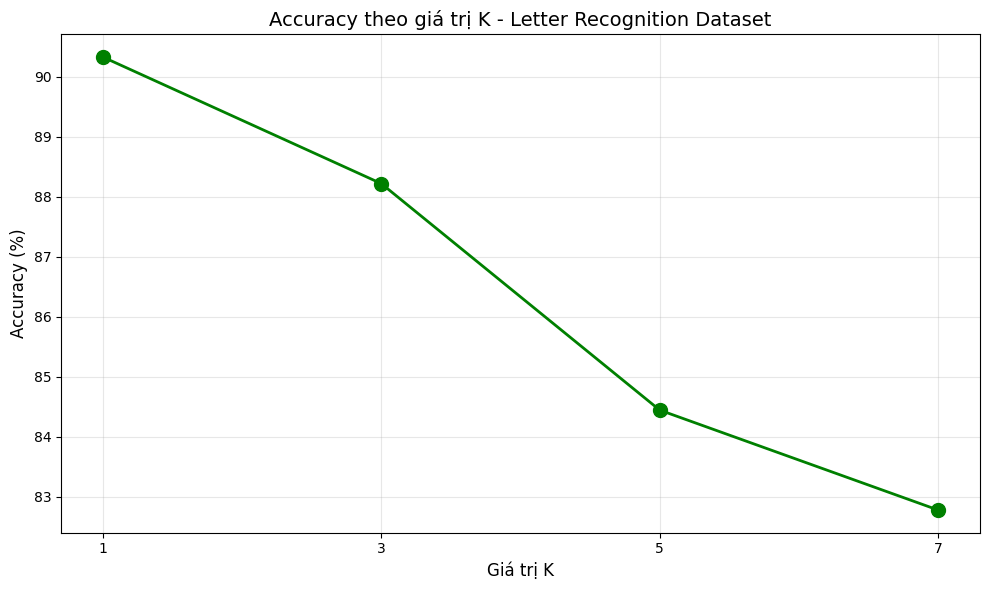

In [ ]:
print("\n--- BƯỚC 1: LOAD DỮ LIỆU LETTER RECOGNITION ---")
print("Đang tải dữ liệu từ UCI repository...")

try:
    # Đọc dữ liệu từ UCI repository
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
    
    # Column names
    columns = ['letter'] + [f'feature_{i}' for i in range(1, 17)]
    
    df_letter = pd.read_csv(url, names=columns)
    
    print(f"✓ Đã tải thành công!")
    print(f"  Số samples: {len(df_letter)}")
    print(f"  Số features: {len(df_letter.columns)-1}")
    print(f"  Số classes: {df_letter['letter'].nunique()}")
    
    print("\nDữ liệu mẫu:")
    print(df_letter.head(10))
    
    print("\nPhân bố các chữ cái:")
    letter_counts = df_letter['letter'].value_counts().sort_index()
    print(letter_counts)
    
    # Chuẩn bị dữ liệu
    print("\n--- BƯỚC 2: CHUẨN BỊ DỮ LIỆU ---")
    X_letter = df_letter.iloc[:, 1:].values
    y_letter = df_letter['letter'].values
    
    # Do dữ liệu lớn, lấy subset để demo
    print("Do dữ liệu lớn (20,000 samples), chọn subset 3,000 samples để demo...")
    from sklearn.utils import resample
    
    # Stratified sampling để giữ tỉ lệ các class
    X_subset, y_subset = resample(X_letter, y_letter, n_samples=3000, 
                                   stratify=y_letter, random_state=42)
    
    print(f"Subset size: {len(X_subset)} samples")
    
    # Chia train/test
    X_train_letter, X_test_letter, y_train_letter, y_test_letter = train_test_split(
        X_subset, y_subset, test_size=0.3, random_state=42, stratify=y_subset
    )
    
    print(f"Training set: {len(X_train_letter)} samples")
    print(f"Test set: {len(X_test_letter)} samples")
    
    # 3. Thử nghiệm với các giá trị k
    print("\n--- BƯỚC 3: THỬ NGHIỆM VỚI CÁC GIÁ TRỊ K ---")
    k_values_letter = [1, 3, 5, 7]
    accuracies_letter = []
    
    print(f"{'k':<5} {'Accuracy':<15} {'Thời gian (giây)':<20}")
    print("-" * 40)
    
    import time
    for k in k_values_letter:
        start_time = time.time()
        knn = KNN_Classifier(k=k)
        knn.fit(X_train_letter, y_train_letter)
        y_pred = knn.predict(X_test_letter)
        acc = accuracy_score(y_test_letter, y_pred)
        elapsed_time = time.time() - start_time
        accuracies_letter.append(acc)
        print(f"{k:<5} {acc*100:>6.2f}%        {elapsed_time:>6.2f}s")
    
    # 4. Chọn k tốt nhất
    print("\n--- BƯỚC 4: ĐÁNH GIÁ CHI TIẾT ---")
    best_k_letter = k_values_letter[np.argmax(accuracies_letter)]
    print(f"K tốt nhất: {best_k_letter}")
    print(f"Accuracy: {max(accuracies_letter)*100:.2f}%")
    
    # Đánh giá chi tiết
    knn_letter = KNN_Classifier(k=best_k_letter)
    knn_letter.fit(X_train_letter, y_train_letter)
    y_pred_letter = knn_letter.predict(X_test_letter)
    
    print("\nClassification Report (top 10 classes):")
    unique_letters = sorted(np.unique(y_letter))[:10]
    print(classification_report(y_test_letter, y_pred_letter, 
                                labels=unique_letters, target_names=unique_letters))
    
    # Confusion matrix (chỉ hiển thị một phần)
    print("\nConfusion Matrix (5 chữ cái đầu tiên):")
    first_5_letters = unique_letters[:5]
    mask = np.isin(y_test_letter, first_5_letters) & np.isin(y_pred_letter, first_5_letters)
    cm_letter = confusion_matrix(y_test_letter[mask], y_pred_letter[mask], labels=first_5_letters)
    print(cm_letter)
    
    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    plt.plot(k_values_letter, [a*100 for a in accuracies_letter], 
             marker='o', linewidth=2, markersize=10, color='green')
    plt.xlabel('Giá trị K', fontsize=12)
    plt.ylabel('Accuracy (%)', fontsize=12)
    plt.title('Accuracy theo giá trị K - Letter Recognition Dataset', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.xticks(k_values_letter)
    plt.tight_layout()
    plt.show()
    
    print("\n" + "="*70)
    print("HOÀN THÀNH BÀI THỰC HÀNH KNN")
    print("="*70)
    
except Exception as e:
    print(f"\n Lỗi khi tải dữ liệu: {e}")
    print("Vui lòng kiểm tra kết nối internet hoặc tải file thủ công từ:")
    print("https://archive.ics.uci.edu/ml/datasets/letter+recognition")

plt.show()

### LAB 06 - BÀI 2: NAIVE BAYES CLASSIFIER
#### Câu 1: Naive Bayes trên Iris Dataset
#### Câu 2: Naive Bayes cho Letter Recognition

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')


# ==============================================================================
# PHẦN 1: XÂY DỰNG CLASS NAIVE BAYES
# ==============================================================================


In [15]:
class NaiveBayes_Classifier:
    """
    Gaussian Naive Bayes Classifier
    Giả định: Features có phân phối chuẩn (Gaussian/Normal distribution)
    """
    def __init__(self):
        self.classes = None
        self.mean = {}
        self.var = {}
        self.priors = {}
    
    def fit(self, X, y):
        """
        Huấn luyện model
        Tính toán:
        - Mean (μ) và Variance (σ²) của mỗi feature cho mỗi class
        - Prior probability P(class) cho mỗi class
        """
        self.classes = np.unique(y)
        print(f"Số classes: {len(self.classes)}")
        
        for c in self.classes:
            X_c = X[y == c]
            
            # Tính mean và variance cho mỗi feature trong class c
            self.mean[c] = np.mean(X_c, axis=0)
            self.var[c] = np.var(X_c, axis=0)
            
            # Tính prior probability P(class)
            self.priors[c] = len(X_c) / len(X)
            
        print(f"Đã tính toán mean, variance và prior cho {len(self.classes)} classes")
    
    def gaussian_pdf(self, x, mean, var):
        """
        Tính Probability Density Function (PDF) theo phân phối Gaussian
        
        Công thức: PDF(x) = (1 / sqrt(2π * σ²)) * exp(-(x - μ)² / (2 * σ²))
        
        Trong đó:
        - x: giá trị cần tính
        - μ (mean): trung bình
        - σ² (var): phương sai
        """
        eps = 1e-4  # Epsilon để tránh chia cho 0
        coeff = 1.0 / np.sqrt(2.0 * np.pi * var + eps)
        exponent = np.exp(-(x - mean) ** 2 / (2 * var + eps))
        return coeff * exponent
    
    def predict_single(self, x):
        """
        Dự đoán cho 1 sample
        
        Áp dụng Bayes' Theorem:
        P(class|x) = P(x|class) * P(class) / P(x)
        
        Với Naive Bayes (giả định features độc lập):
        P(x|class) = P(x1|class) * P(x2|class) * ... * P(xn|class)
        
        Sử dụng log để tránh underflow:
        log P(class|x) = log P(class) + sum(log P(xi|class))
        """
        posteriors = []
        
        for c in self.classes:
            # Prior: P(class)
            prior = np.log(self.priors[c])
            
            # Likelihood: P(x|class) = P(x1|class) * P(x2|class) * ...
            # Trong log space: log P(x|class) = sum(log P(xi|class))
            likelihood = np.sum(np.log(self.gaussian_pdf(
                x, self.mean[c], self.var[c]
            )))
            
            # Posterior: P(class|x) ∝ P(class) * P(x|class)
            posterior = prior + likelihood
            posteriors.append(posterior)
        
        # Trả về class có posterior cao nhất
        return self.classes[np.argmax(posteriors)]
    
    def predict(self, X):
        """Dự đoán cho nhiều samples"""
        predictions = [self.predict_single(x) for x in X]
        return np.array(predictions)
    
    def score(self, X_test, y_test):
        """Tính accuracy"""
        predictions = self.predict(X_test)
        return accuracy_score(y_test, predictions)

# ==============================================================================
# CÂU 1: NAIVE BAYES TRÊN IRIS DATASET
# ==============================================================================


In [16]:
# 1. Load Iris dataset
print("\n--- BƯỚC 1: LOAD DỮ LIỆU ---")
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
target_names = iris.target_names
feature_names = iris.feature_names

print(f"Số samples: {X_iris.shape[0]}")
print(f"Số features: {X_iris.shape[1]}")
print(f"Các classes: {list(target_names)}")
print(f"Feature names: {list(feature_names)}")

# Hiển thị dữ liệu mẫu
df_iris = pd.DataFrame(X_iris, columns=feature_names)
df_iris['species'] = [target_names[i] for i in y_iris]
print("\nDữ liệu mẫu:")
print(df_iris.head())

# Thống kê
print("\nPhân bố classes:")
for i, name in enumerate(target_names):
    count = np.sum(y_iris == i)
    print(f"  - {name}: {count} samples ({count/len(y_iris)*100:.1f}%)")



--- BƯỚC 1: LOAD DỮ LIỆU ---
Số samples: 150
Số features: 4
Các classes: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Dữ liệu mẫu:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Phân bố classes:
  - setosa: 50 samples (33.3%)
  - versicolor: 50 samples (33.3%)
  - virginica: 50 samples (33.3%)


In [17]:
# 2. Chia train/test
print("\n--- BƯỚC 2: CHIA DỮ LIỆU TRAIN/TEST ---")
X_train, X_test, y_train, y_test = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)
print(f"Training set: {len(X_train)} samples ({len(X_train)/len(X_iris)*100:.1f}%)")
print(f"Test set: {len(X_test)} samples ({len(X_test)/len(X_iris)*100:.1f}%)")



--- BƯỚC 2: CHIA DỮ LIỆU TRAIN/TEST ---
Training set: 105 samples (70.0%)
Test set: 45 samples (30.0%)


In [18]:
# 3. Huấn luyện Naive Bayes
print("\n--- BƯỚC 3: HUẤN LUYỆN NAIVE BAYES ---")
nb = NaiveBayes_Classifier()
nb.fit(X_train, y_train)

# Hiển thị thông tin đã học
print("\nThông tin đã học từ training data:")
print("\n1. Prior Probabilities P(class):")
for c in nb.classes:
    print(f"   P({target_names[c]}) = {nb.priors[c]:.4f}")

print("\n2. Mean values cho mỗi feature trong mỗi class:")
for c in nb.classes:
    print(f"\n   Class: {target_names[c]}")
    for i, fname in enumerate(feature_names):
        print(f"   - {fname}: μ = {nb.mean[c][i]:.3f}, σ² = {nb.var[c][i]:.3f}")



--- BƯỚC 3: HUẤN LUYỆN NAIVE BAYES ---
Số classes: 3
Đã tính toán mean, variance và prior cho 3 classes

Thông tin đã học từ training data:

1. Prior Probabilities P(class):
   P(setosa) = 0.3333
   P(versicolor) = 0.3333
   P(virginica) = 0.3333

2. Mean values cho mỗi feature trong mỗi class:

   Class: setosa
   - sepal length (cm): μ = 4.989, σ² = 0.103
   - sepal width (cm): μ = 3.426, σ² = 0.174
   - petal length (cm): μ = 1.486, σ² = 0.023
   - petal width (cm): μ = 0.240, σ² = 0.009

   Class: versicolor
   - sepal length (cm): μ = 5.949, σ² = 0.241
   - sepal width (cm): μ = 2.731, σ² = 0.086
   - petal length (cm): μ = 4.237, σ² = 0.211
   - petal width (cm): μ = 1.309, σ² = 0.036

   Class: virginica
   - sepal length (cm): μ = 6.683, σ² = 0.425
   - sepal width (cm): μ = 3.009, σ² = 0.117
   - petal length (cm): μ = 5.631, σ² = 0.323
   - petal width (cm): μ = 2.069, σ² = 0.064


In [19]:
# 4. Dự đoán
print("\n--- BƯỚC 4: DỰ ĐOÁN VÀ ĐÁNH GIÁ ---")
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy*100:.2f}%")
print(f"Số dự đoán đúng: {np.sum(y_pred == y_test)}/{len(y_test)}")
print(f"Số dự đoán sai: {np.sum(y_pred != y_test)}/{len(y_test)}")



--- BƯỚC 4: DỰ ĐOÁN VÀ ĐÁNH GIÁ ---

Accuracy: 91.11%
Số dự đoán đúng: 41/45
Số dự đoán sai: 4/45


In [20]:
# 5. Classification Report
print("\n--- BƯỚC 5: CLASSIFICATION REPORT ---")
print(classification_report(y_test, y_pred, target_names=target_names))


--- BƯỚC 5: CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



--- BƯỚC 6: CONFUSION MATRIX ---

Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


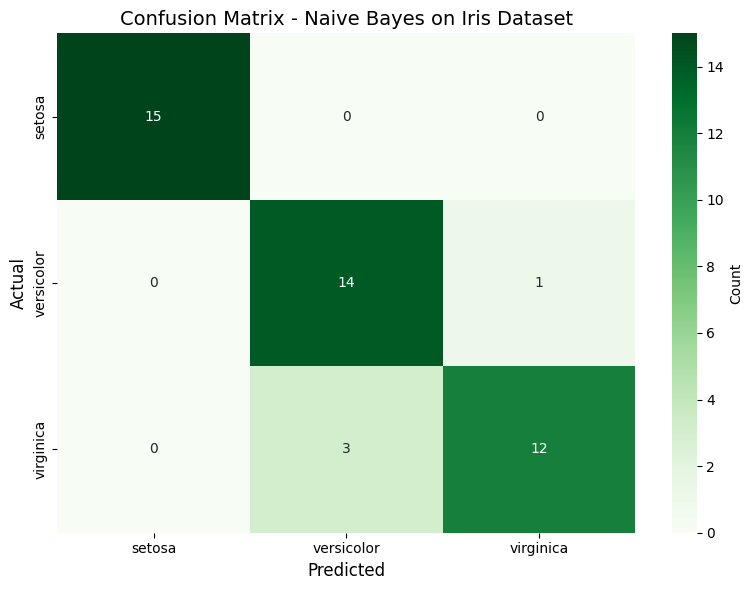

In [21]:
# 6. Confusion Matrix
print("--- BƯỚC 6: CONFUSION MATRIX ---")
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Vẽ confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=target_names, yticklabels=target_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Naive Bayes on Iris Dataset', fontsize=14)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()


In [22]:
# 7. Phân tích chi tiết từng class
print("\n--- BƯỚC 7: PHÂN TÍCH CHI TIẾT TỪNG CLASS ---")
for i, name in enumerate(target_names):
    mask_true = y_test == i
    mask_pred = y_pred == i
    
    true_positive = np.sum(mask_true & mask_pred)
    false_positive = np.sum(~mask_true & mask_pred)
    false_negative = np.sum(mask_true & ~mask_pred)
    true_negative = np.sum(~mask_true & ~mask_pred)
    
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    
    print(f"\nClass: {name}")
    print(f"  True Positive: {true_positive}")
    print(f"  False Positive: {false_positive}")
    print(f"  False Negative: {false_negative}")
    print(f"  Precision: {precision:.3f}")
    print(f"  Recall: {recall:.3f}")


--- BƯỚC 7: PHÂN TÍCH CHI TIẾT TỪNG CLASS ---

Class: setosa
  True Positive: 15
  False Positive: 0
  False Negative: 0
  Precision: 1.000
  Recall: 1.000

Class: versicolor
  True Positive: 14
  False Positive: 3
  False Negative: 1
  Precision: 0.824
  Recall: 0.933

Class: virginica
  True Positive: 12
  False Positive: 1
  False Negative: 3
  Precision: 0.923
  Recall: 0.800


In [23]:
# 8. Test với dữ liệu mới
print("\n--- BƯỚC 8: TEST VỚI DỮ LIỆU MỚI ---")
new_samples = np.array([
    [5.1, 3.5, 1.4, 0.2],  # Giống setosa
    [6.5, 3.0, 5.2, 2.0],  # Giống virginica
    [5.7, 2.8, 4.1, 1.3]   # Giống versicolor
])

predictions = nb.predict(new_samples)
print("\nDự đoán cho dữ liệu mới:")
print(f"{'Sample':<10} {'Sepal L':<10} {'Sepal W':<10} {'Petal L':<10} {'Petal W':<10} {'Predicted':<15}")
print("-" * 65)
for i, sample in enumerate(new_samples):
    pred_name = target_names[predictions[i]]
    print(f"Sample {i+1}  {sample[0]:<10.1f} {sample[1]:<10.1f} {sample[2]:<10.1f} {sample[3]:<10.1f} {pred_name:<15}")




--- BƯỚC 8: TEST VỚI DỮ LIỆU MỚI ---

Dự đoán cho dữ liệu mới:
Sample     Sepal L    Sepal W    Petal L    Petal W    Predicted      
-----------------------------------------------------------------
Sample 1  5.1        3.5        1.4        0.2        setosa         
Sample 2  6.5        3.0        5.2        2.0        virginica      
Sample 3  5.7        2.8        4.1        1.3        versicolor     


# ==============================================================================
# CÂU 2: NAIVE BAYES CHO LETTER RECOGNITION
# ==============================================================================



--- BƯỚC 1: LOAD DỮ LIỆU LETTER RECOGNITION ---
Đang tải dữ liệu từ UCI repository...
 Đã tải thành công!
  Số samples: 20000
  Số features: 16
  Số classes (26 chữ cái): 26

Dữ liệu mẫu:
  letter  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0      T          2          8          3          5          1          8   
1      I          5         12          3          7          2         10   
2      D          4         11          6          8          6         10   
3      N          7         11          6          6          3          5   
4      G          2          1          3          1          1          8   
5      S          4         11          5          8          3          8   
6      B          4          2          5          4          4          8   
7      A          1          1          3          2          1          8   
8      J          2          2          4          4          2         10   
9      M         11         15 

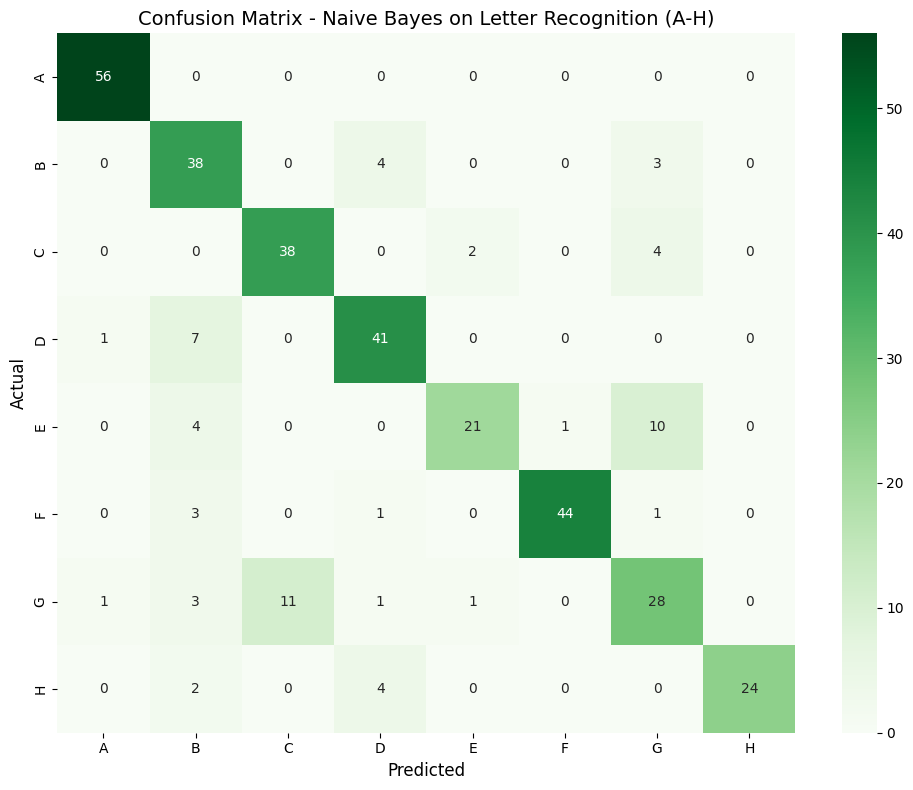


--- BƯỚC 7: ACCURACY THEO TỪNG CHỮ CÁI ---

 Top 10 chữ cái có accuracy cao nhất:
   A: 94.92%
   M: 88.14%
   W: 87.50%
   L: 78.95%
   V: 77.19%
   F: 75.86%
   I: 75.44%
   U: 75.41%
   P: 73.33%
   T: 71.67%

 Top 10 chữ cái có accuracy thấp nhất:
   E: 36.21%
   X: 37.29%
   S: 37.50%
   Y: 40.68%
   H: 43.64%
   K: 44.64%
   G: 48.28%
   N: 55.93%
   R: 59.65%
   Q: 62.71%


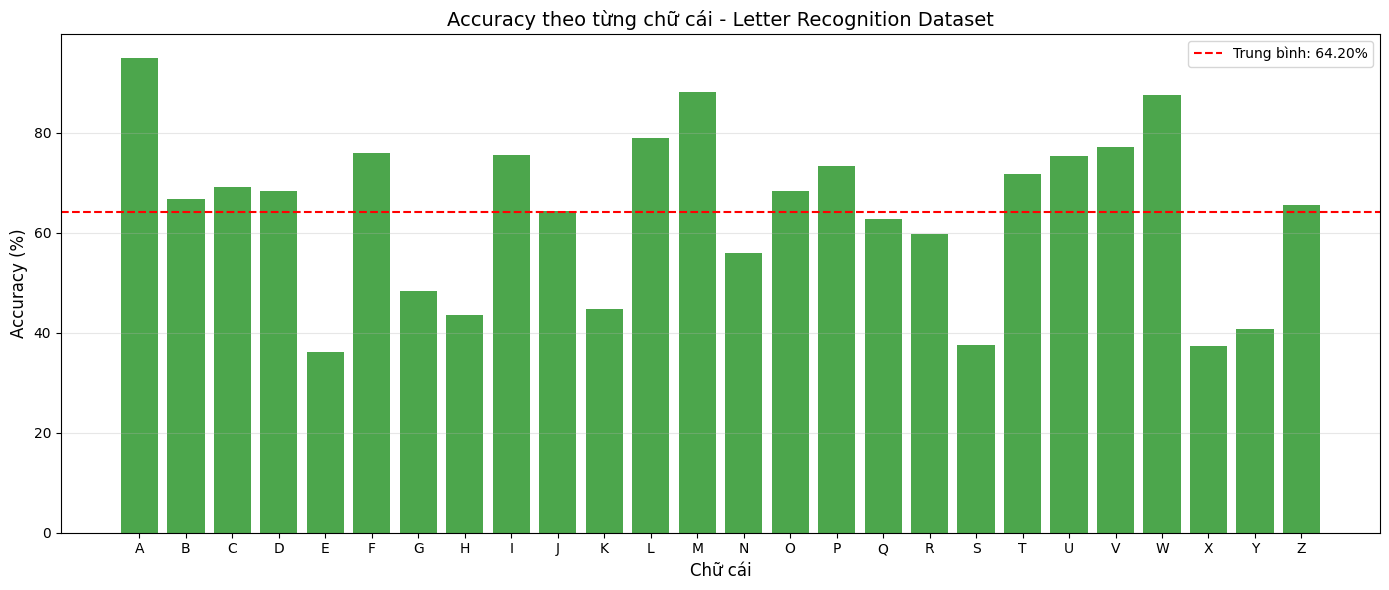


HOÀN THÀNH BÀI THỰC HÀNH NAIVE BAYES


In [25]:
print("\n--- BƯỚC 1: LOAD DỮ LIỆU LETTER RECOGNITION ---")
print("Đang tải dữ liệu từ UCI repository...")

try:
    # Đọc dữ liệu từ UCI repository
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
    
    columns = ['letter'] + [f'feature_{i}' for i in range(1, 17)]
    df_letter = pd.read_csv(url, names=columns)
    
    print(f" Đã tải thành công!")
    print(f"  Số samples: {len(df_letter)}")
    print(f"  Số features: {len(df_letter.columns)-1}")
    print(f"  Số classes (26 chữ cái): {df_letter['letter'].nunique()}")
    
    print("\nDữ liệu mẫu:")
    print(df_letter.head(10))
    
    print("\nThống kê features:")
    print(df_letter.iloc[:, 1:].describe())
    
    # Chuẩn bị dữ liệu
    print("\n--- BƯỚC 2: CHUẨN BỊ DỮ LIỆU ---")
    X_letter = df_letter.iloc[:, 1:].values
    y_letter = df_letter['letter'].values
    
    # Do dữ liệu lớn, lấy subset để demo
    print("Do dữ liệu lớn (20,000 samples), chọn subset 5,000 samples để demo...")
    from sklearn.utils import resample
    
    X_subset, y_subset = resample(X_letter, y_letter, n_samples=5000, 
                                   stratify=y_letter, random_state=42)
    
    print(f"Subset size: {len(X_subset)} samples")
    
    # Chia train/test
    X_train_letter, X_test_letter, y_train_letter, y_test_letter = train_test_split(
        X_subset, y_subset, test_size=0.3, random_state=42, stratify=y_subset
    )
    
    print(f"Training set: {len(X_train_letter)} samples")
    print(f"Test set: {len(X_test_letter)} samples")
    
    # 3. Huấn luyện Naive Bayes
    print("\n--- BƯỚC 3: HUẤN LUYỆN NAIVE BAYES ---")
    import time
    start_time = time.time()
    
    nb_letter = NaiveBayes_Classifier()
    nb_letter.fit(X_train_letter, y_train_letter)
    
    training_time = time.time() - start_time
    print(f"Thời gian huấn luyện: {training_time:.2f} giây")
    
    # 4. Dự đoán
    print("\n--- BƯỚC 4: DỰ ĐOÁN VÀ ĐÁNH GIÁ ---")
    start_time = time.time()
    y_pred_letter = nb_letter.predict(X_test_letter)
    prediction_time = time.time() - start_time
    
    accuracy_letter = accuracy_score(y_test_letter, y_pred_letter)
    
    print(f"Thời gian dự đoán: {prediction_time:.2f} giây")
    print(f"Accuracy: {accuracy_letter*100:.2f}%")
    print(f"Số dự đoán đúng: {np.sum(y_pred_letter == y_test_letter)}/{len(y_test_letter)}")
    
    # 5. Classification Report (hiển thị 10 chữ cái đầu)
    print("\n--- BƯỚC 5: CLASSIFICATION REPORT (10 chữ cái đầu) ---")
    unique_letters = sorted(np.unique(y_letter))[:10]
    print(classification_report(y_test_letter, y_pred_letter, 
                                labels=unique_letters, target_names=unique_letters,
                                zero_division=0))
    
    # 6. Confusion Matrix cho 8 chữ cái đầu
    print("\n--- BƯỚC 6: CONFUSION MATRIX (8 chữ cái đầu) ---")
    first_8_letters = unique_letters[:8]
    mask = np.isin(y_test_letter, first_8_letters) & np.isin(y_pred_letter, first_8_letters)
    
    if np.sum(mask) > 0:
        cm_letter = confusion_matrix(y_test_letter[mask], y_pred_letter[mask], 
                                     labels=first_8_letters)
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm_letter, annot=True, fmt='d', cmap='Greens',
                    xticklabels=first_8_letters, yticklabels=first_8_letters)
        plt.title('Confusion Matrix - Naive Bayes on Letter Recognition (A-H)', fontsize=14)
        plt.ylabel('Actual', fontsize=12)
        plt.xlabel('Predicted', fontsize=12)
        plt.tight_layout()
        plt.show()
    
    # 7. Phân tích accuracy theo từng chữ cái
    print("\n--- BƯỚC 7: ACCURACY THEO TỪNG CHỮ CÁI ---")
    letter_accuracies = []
    all_letters = sorted(np.unique(y_letter))
    
    for letter in all_letters:
        mask_true = y_test_letter == letter
        if np.sum(mask_true) > 0:
            mask_pred_correct = (y_test_letter == letter) & (y_pred_letter == letter)
            acc = np.sum(mask_pred_correct) / np.sum(mask_true) * 100
            letter_accuracies.append(acc)
        else:
            letter_accuracies.append(0)
    
    # Hiển thị top 10 và bottom 10
    sorted_indices = np.argsort(letter_accuracies)
    
    print("\n Top 10 chữ cái có accuracy cao nhất:")
    for idx in sorted_indices[-10:][::-1]:
        print(f"   {all_letters[idx]}: {letter_accuracies[idx]:.2f}%")
    
    print("\n Top 10 chữ cái có accuracy thấp nhất:")
    for idx in sorted_indices[:10]:
        if letter_accuracies[idx] > 0:
            print(f"   {all_letters[idx]}: {letter_accuracies[idx]:.2f}%")
    
    # Vẽ biểu đồ accuracy
    plt.figure(figsize=(14, 6))
    plt.bar(range(len(all_letters)), letter_accuracies, color='green', alpha=0.7)
    plt.xlabel('Chữ cái', fontsize=12)
    plt.ylabel('Accuracy (%)', fontsize=12)
    plt.title('Accuracy theo từng chữ cái - Letter Recognition Dataset', fontsize=14)
    plt.xticks(range(len(all_letters)), all_letters)
    plt.grid(True, alpha=0.3, axis='y')
    plt.axhline(y=accuracy_letter*100, color='red', linestyle='--', 
                label=f'Trung bình: {accuracy_letter*100:.2f}%')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print("\n" + "="*70)
    print("HOÀN THÀNH BÀI THỰC HÀNH NAIVE BAYES")
    print("="*70)
    
except Exception as e:
    print(f"\n Lỗi khi tải dữ liệu: {e}")
    print("Vui lòng kiểm tra kết nối internet hoặc tải file thủ công từ:")
    print("https://archive.ics.uci.edu/ml/datasets/letter+recognition")

plt.show()